# Load Data

In [1]:
from pathlib import Path
from sklearn.model_selection import train_test_split
from helper import read_imdb_split,download_data
import pandas as pd
import numpy as np


np.random.seed(1337)


############################################

In [3]:
download_data()

'Already downloaded and extracted.'

In [4]:
texts, labels = read_imdb_split('../data/aclImdb/train')

# remove later for faster prototyping
texts = texts[0:1000]
labels = labels[0:1000]

In [5]:
data = pd.DataFrame({'text':texts, 'labels':labels})

In [6]:
data['labels'].value_counts()


labels
1    511
0    489
Name: count, dtype: int64

# Text Processing
https://medium.com/@bedigunjit/simple-guide-to-text-classification-nlp-using-svm-and-naive-bayes-with-python-421db3a72d34

### Step 1 Data Preprocessing
1. Tokenization — convert sentences to words
2. Removing unnecessary punctuation, tags
3. Removing stop words — frequent words such as ”the”, ”is”, etc. that do not have specific semantic
4. Stemming — words are reduced to a root by removing inflection through dropping unnecessary characters, usually a suffix.
5. Lemmatization — Another approach to remove inflection by determining the part of speech and utilizing detailed database of the language.

In [7]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [8]:
stopwords_set = set(stopwords.words('english'))

tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

word_Lemmatized = WordNetLemmatizer()

def preprocessing(text):
    # Using list comprehension to generate the final words
    final_words = [
        word_Lemmatized.lemmatize(word, tag_map[tag[0]])
        for word, tag in pos_tag(text)
        if word.isalpha() and word not in stopwords_set
    ]
    return ' '.join(final_words)

In [9]:
# Step - a : Remove blank rows if any.
data['text'].dropna(inplace=True)
# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
data['text'] = [entry.lower() for entry in data['text']]
# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
data['text']= [word_tokenize(entry) for entry in data['text']]
# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.

data['text_final'] = data['text'].apply(preprocessing)

In [10]:
data.head()

,text,labels,text_final
0,"[great, little, thriller, ., i, was, expecting...",1,great little thriller expect type silly horror...
1,"[nothing, could, have, saved, this, movie, ,, ...",0,nothing could save movie even br br ten year a...
2,"[this, was, a, good, movie, ., it, was, n't, y...",1,good movie typical war flick something bit dif...
3,"[from, the, pen, of, richard, condon, (, the, ...",0,pen richard condon manchurian candidate come m...
4,"[i, suppose, that, today, this, film, has, rel...",0,suppose today film relevance early sofia loren...


In [11]:
data['text_final'].head()

0    great little thriller expect type silly horror...
1    nothing could save movie even br br ten year a...
2    good movie typical war flick something bit dif...
3    pen richard condon manchurian candidate come m...
4    suppose today film relevance early sofia loren...
Name: text_final, dtype: object

### Step 2 Train Test Split

In [12]:
corpus = data['text_final'].tolist()
labels = data['labels'].tolist()

In [13]:
corpus_train, corpus_test, y_train, y_test = model_selection.train_test_split(corpus,labels,test_size=0.3)

In [14]:
print(corpus_train)

['know trouble opening narration basically tell survive go downhill unnecessary matrix camera work pointless cut video game footage crusty old sea captain wacky seaman raver become skilled combatant blink eye even zombie br br hop least bad good zombie movie one bad involve creation bar ever make movie br br', 'ironic seuss fable emphasize christmas one hyped market successful blockbuster holiday season general gist ron howard adaptation grinch bane christmas stem early childhood incident who catch materialism season save cindy lou play well taylor momsen movie make ardent ambitious attempt capture wackiness sentiment seuss story end result movie lurch never quite pack emotional punch chuck jones animate version jim carrey noteworthy performance devilish grinch whether dialogue pacing extraneous storyline heap upon initial plot transformation bitter miser gleeful benefactor ignite convincingly wonderful visuals work amazing yet beyond technical triumph element two br br succinctness br

# Word Vectorization

In [30]:
#https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/linear_models/Sentiment%20Analysis%20with%20Logistic%20Regression.html
vectorizer = TfidfVectorizer(min_df=10)

X_train = vectorizer.fit_transform(corpus_train)
X_test = vectorizer.transform(corpus_test)


In [26]:
print(vectorizer.vocabulary_)

{'know': 545, 'trouble': 1044, 'opening': 689, 'basically': 88, 'tell': 1000, 'survive': 984, 'go': 435, 'camera': 138, 'work': 1124, 'pointless': 739, 'cut': 229, 'video': 1076, 'game': 422, 'footage': 403, 'old': 686, 'become': 94, 'eye': 352, 'even': 330, 'zombie': 1143, 'br': 122, 'hop': 478, 'least': 563, 'bad': 81, 'good': 437, 'movie': 644, 'one': 687, 'involve': 524, 'bar': 84, 'ever': 333, 'make': 596, 'successful': 971, 'season': 861, 'general': 425, 'adaptation': 14, 'early': 295, 'catch': 151, 'save': 848, 'play': 732, 'well': 1100, 'attempt': 67, 'capture': 140, 'story': 954, 'end': 311, 'result': 820, 'never': 661, 'quite': 785, 'emotional': 309, 'version': 1073, 'jim': 529, 'performance': 718, 'whether': 1103, 'dialogue': 264, 'storyline': 955, 'upon': 1064, 'initial': 512, 'plot': 736, 'wonderful': 1120, 'amazing': 36, 'yet': 1138, 'beyond': 103, 'element': 306, 'two': 1052, 'soul': 928, 'maybe': 611, 'cartoon': 145, 'fall': 358, 'short': 888, 'feel': 373, 'three': 1018

# Train SVM model






In [27]:
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score

In [31]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', probability=True)
SVM.fit(X_train.toarray(),y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test.toarray())
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  82.33333333333334


In [32]:
# find samples that are misclassified

predictions = pd.DataFrame({'text':X_test, 'label':y_test, 'prediction':predictions_SVM})
    

In [20]:
misclassified = predictions[predictions['label'] != predictions['prediction']]

In [33]:
def print_sample(index):
    print('text:', misclassified.iloc[index]['text'])
    print('Correct Label:', misclassified.iloc[index]['label'])
    print('Predicted Label:', misclassified.iloc[index]['prediction'])

In [34]:
print_sample(11)

text:   (0, 1136)	0.22223512617453123
  (0, 1118)	0.13188015616475585
  (0, 1100)	0.08896925903391513
  (0, 1094)	0.09723140210203994
  (0, 1055)	0.15422869248329651
  (0, 1048)	0.1135064471421024
  (0, 1024)	0.07724297728106262
  (0, 1013)	0.08839849239636821
  (0, 1012)	0.10117879185647961
  (0, 883)	0.19324559287371176
  (0, 833)	0.19324559287371176
  (0, 811)	0.14883020095125699
  (0, 802)	0.19079462234853042
  (0, 705)	0.11567278490972464
  (0, 691)	0.16159970360746023
  (0, 686)	0.12123054899967473
  (0, 659)	0.1266898812233978
  (0, 652)	0.12920178413689373
  (0, 645)	0.09494669075014574
  (0, 644)	0.2921949054449077
  (0, 596)	0.07088817917010064
  (0, 575)	0.07052230670026126
  (0, 557)	0.1411794057900957
  (0, 476)	0.1582749297979658
  (0, 419)	0.12432495961043243
  (0, 393)	0.18848378587004452
  (0, 388)	0.10143878395503556
  (0, 355)	0.16650615703374075
  (0, 330)	0.0851334212292675
  (0, 317)	0.18225168476371065
  (0, 296)	0.18848378587004452
  (0, 187)	0.3956404684942675


In [87]:
import shap


feature_names = vectorizer.get_feature_names_out()
explainer = shap.Explainer(SVM.predict_proba, X_train.toarray(), feature_names=feature_names, max_evals=3000)
shap_values = explainer(X_test[:10].toarray())
# Why default is the permutation explainer?


Permutation explainer: 11it [02:05, 13.89s/it]                        


In [36]:
#feature_names = vectorizer.get_feature_names_out()
#explainer = shap.Explainer(SVM.predict_proba, X_train.toarray(), feature_names=feature_names, max_evals = 1854721)

#shap_values = explainer(X_test[:10].toarray())


Permutation explainer: 11it [02:06, 14.05s/it]                        


In [38]:
# explainer = shap.PartitionExplainer(SVM.predict_proba, X_train.toarray(), feature_names=feature_names, max_evals=3000)

In [39]:
# shap_values = explainer(X_test[:10].toarray())

# Weird Exlanation

Partition explainer: 11it [14:03, 84.33s/it]                        


102


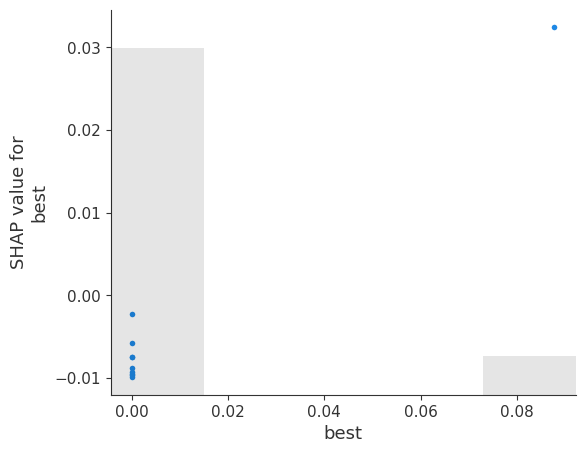

In [88]:
best_index = feature_names.tolist().index("best")
print(best_index)
shap.plots.scatter(shap_values[:,best_index,1])

In [89]:
# Ivestigating the 6th Sample
idx = 6
print(corpus_test[idx])

awesome action film great one liner arnie stylishly make lot tense action keep one satisfied character awesome richard dawson menacing main villain yes ton plot hole however highly highly entertaining great end well great story arnie maria conchita alonso great chemistry together character development also pretty good superb performance directing great paul michael glaser good job awesome use color keep stylish throughout awesome camera angle overall keep film fast pace good job little bit gore get bloody gunshot wound explode head slit throat bloody chainsaw slice skinless corps blood impaling acting great arnold schwarzenegger amazing always excellent acting department ton hilarious one liner kick as always big physical presence ton fun watch arnie rule maria conchita alonso well really cute good chemistry arnie yaphet kotto decent much marvin mcintyre good geeky type guy cool richard dawson awesome main villain menacing fun watch jesse ventura jim brown erland van lidth gu rethwisch

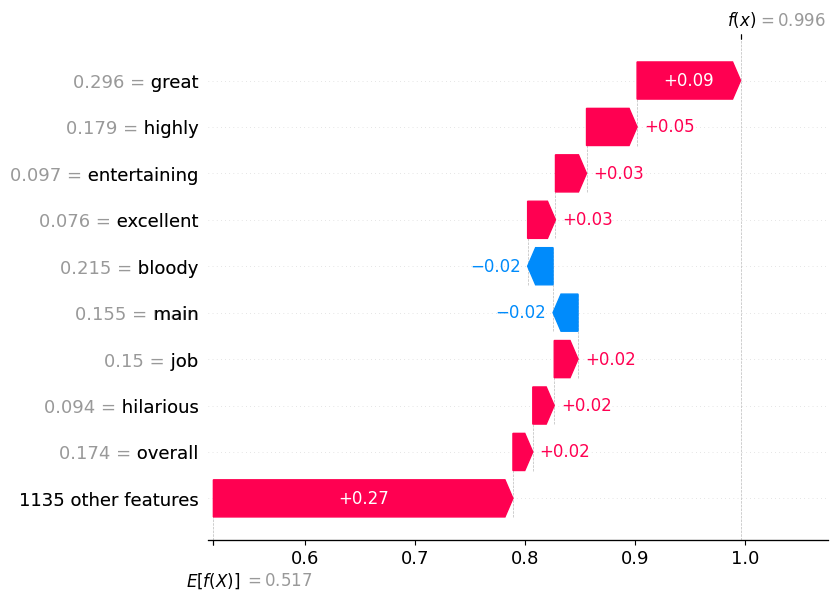

In [90]:
shap.plots.waterfall(shap_values[idx,:,1]) # Klassifizierung 1 = positiv

In [91]:
misclassified

,text,label,prediction
8,"(0, 1129)\t0.0922311315403707\n (0, 1013)\t...",1,0
22,"(0, 1136)\t0.03408457939192708\n (0, 1129)\...",1,0
27,"(0, 1141)\t0.07234757137599093\n (0, 1137)\...",0,1
40,"(0, 1138)\t0.09543251499317883\n (0, 1127)\...",0,1
43,"(0, 1129)\t0.06760092306747942\n (0, 1100)\...",0,1
49,"(0, 1140)\t0.08579370739590027\n (0, 1100)\...",0,1
53,"(0, 1107)\t0.12708556853312603\n (0, 1106)\...",1,0
54,"(0, 1134)\t0.13501933615554715\n (0, 1129)\...",0,1
57,"(0, 1140)\t0.1732137165909713\n (0, 1125)\t...",1,0
59,"(0, 1094)\t0.0808137476432551\n (0, 1092)\t...",0,1


although recent part homer epic troy brad pitt entertain iphigenia incandescent irene pappa breathtaking unfold natural setting greek actor speak language lends authenticity chance encounter film one directv many movie channel keep interested spite concentration problem glitter bling movie fabulously rich story impeccably tell actor real one feel eavesdrop real family turmoil think even homer really exist would proud br br jlh


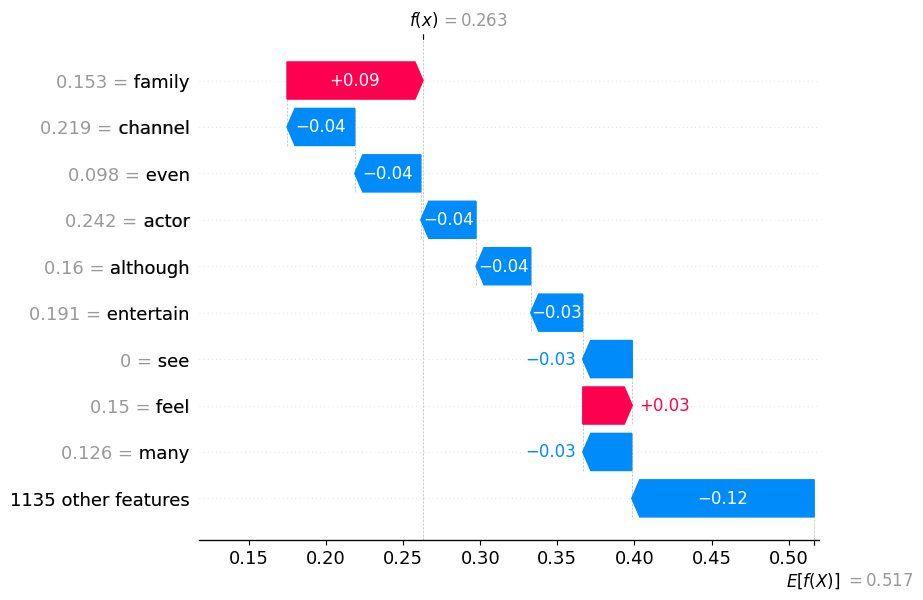

In [94]:
# Index 8 is misclassified as negative

idx = 8

print(corpus_test[idx])
shap.plots.waterfall(shap_values[idx,:,1]) # Klassifizierung 1 = positiv

### Analysis why was sample 8 Misclassified

it seems like the model learned that:
- channel 

In [93]:
shap_values

.values =
array([[[ 8.93562338e-06, -8.93562338e-06],
        [-4.51045368e-04,  4.51045368e-04],
        [-5.28324013e-03,  5.28324013e-03],
        ...,
        [-1.57431736e-03,  1.57431736e-03],
        [ 3.57257091e-05, -3.57257091e-05],
        [-1.99368590e-04,  1.99368590e-04]],

       [[ 4.51827874e-05, -4.51827874e-05],
        [-4.10257998e-04,  4.10257998e-04],
        [ 3.08118029e-04, -3.08118029e-04],
        ...,
        [-1.15532192e-03,  1.15532192e-03],
        [ 2.99531933e-05, -2.99531933e-05],
        [-1.34165070e-04,  1.34165070e-04]],

       [[ 3.28109831e-05, -3.28109831e-05],
        [-4.26690885e-04,  4.26690885e-04],
        [ 3.67979446e-04, -3.67979446e-04],
        ...,
        [-2.59367410e-03,  2.59367410e-03],
        [ 4.84092098e-05, -4.84092098e-05],
        [-1.86013830e-04,  1.86013830e-04]],

       ...,

       [[ 1.54397919e-05, -1.54397919e-05],
        [-6.77377392e-04,  6.77377392e-04],
        [ 3.12400214e-04, -3.12400214e-04],
        

In [95]:
shap.plots.beeswarm(shap_values)

ValueError: The beeswarm plot does not support plotting explanations with instances that have more than one dimension!